In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# 범죄 데이터 준비 
df_crime = pd.read_excel('data-files/crime-in-seoul.xlsx', header=3)
df_crime2 = df_crime.iloc[:,-10:].copy()
df_crime2['자치구'] = df_crime.iloc[:,1]

new_columns = ['살인발생', '살인검거', '강도발생', '강도검거', '강간발생', '강간검거', '절도발생', '절도검거', '폭력발생', '폭력검거', '자치구']    
df_crime2.columns = new_columns 

df_crime2.set_index('자치구', inplace=True)
df_crime2 = df_crime2.iloc[1:, :]

# 서대문구, 강도발생 데이터가 '-' -> 0으로, 자료형은 int로 변경
df_crime2.loc['서대문구', '강도발생'] = '0'
df_crime2['강도발생'] = df_crime2['강도발생'].astype(int)   # astype : 자료형 변경

df_crime2['살인검거율'] = df_crime2['살인검거'] / df_crime2['살인발생']
df_crime2['강도검거율'] = df_crime2['강도검거'] / df_crime2['강도발생']
df_crime2['강간검거율'] = df_crime2['강간검거'] / df_crime2['강간발생']
df_crime2['절도검거율'] = df_crime2['절도검거'] / df_crime2['절도발생']
df_crime2['폭력검거율'] = df_crime2['폭력검거'] / df_crime2['폭력발생']

df_crime2.to_csv('data-files/crime-in-seoul-2.csv')

df_pop = pd.read_csv('data-files/population-in-seoul-2.csv')
df_cc = pd.read_csv('data-files/cctv-in-seoul-2.csv')
df_cc['자치구'] = df_cc['자치구'].str.replace(' ','')

df_pc = pd.merge(left=df_pop, right=df_crime2, on='자치구')
df_all= pd.merge(left=df_pc, right=df_cc, on='자치구')
df_all.set_index("자치구", inplace=True)

df_all['살인발생율'] = df_all['살인발생'] / df_all['2024-인구수']
df_all['강도발생율'] = df_all['강도발생'] / df_all['2024-인구수']
df_all['강간발생율'] = df_all['강간발생'] / df_all['2024-인구수']
df_all['절도발생율'] = df_all['절도발생'] / df_all['2024-인구수']
df_all['폭력발생율'] = df_all['폭력발생'] / df_all['2024-인구수']
df_all

cols2 = ['최근증가율',
         '살인검거율', '강도검거율', '강간검거율', '절도검거율', '폭력검거율',
         '살인발생율', '강도발생율','강간발생율', '절도발생율', '폭력발생율']

df_all[cols2]
df_all[cols2].corr()

d:\apps\minicond3\envs\python-env-311\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,최근증가율,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,살인발생율,강도발생율,강간발생율,절도발생율,폭력발생율
최근증가율,1.000000,-0.023037,0.379936,0.631511,0.219965,0.202701,0.267272,0.136392,0.150921,0.111496,0.136907
살인검거율,-0.023037,1.000000,-0.269053,0.158911,0.370667,0.274084,-0.041224,0.046452,0.000804,0.071894,0.127862
강도검거율,0.379936,-0.269053,1.000000,0.405725,0.074453,0.030592,0.230080,0.008939,0.165399,0.052082,0.185873
강간검거율,0.631511,0.158911,0.405725,1.000000,0.527759,0.072463,0.393167,0.338628,0.477556,0.390956,0.494310
절도검거율,0.219965,0.370667,0.074453,0.527759,1.000000,0.513237,0.209957,0.013261,0.115627,0.087630,0.231712
폭력검거율,0.202701,0.274084,0.030592,0.072463,0.513237,1.000000,-0.030134,0.087607,-0.035787,0.067700,0.069617
살인발생율,0.267272,-0.041224,0.230080,0.393167,0.209957,-0.030134,1.000000,0.572225,0.385552,0.428216,0.476420
강도발생율,0.136392,0.046452,0.008939,0.338628,0.013261,0.087607,0.572225,1.000000,0.796950,0.823970,0.805166
강간발생율,0.150921,0.000804,0.165399,0.477556,0.115627,-0.035787,0.385552,0.796950,1.000000,0.804098,0.904083
절도발생율,0.111496,0.071894,0.052082,0.390956,0.087630,0.067700,0.428216,0.823970,0.804098,1.000000,0.914544


In [2]:

# 범죄 데이터 준비
df_crime = pd.read_excel("data-files/crime-in-seoul.xlsx", header=3)
df_crime2 = df_crime.iloc[:, -10:].copy()
df_crime2["자치구"] = df_crime.iloc[:, 1]

# 1. 컬럼명 변경 : 살인발생, 살인검거, 강도발생, 강도검거, 강간발생, 강간검거, 절도발생, 절도검거, 폭력발생, 폭력검거
new_columns = ["살인발생", "살인검거", "강도발생", '강도검거', "강간발생", "강간검거", "절도발생", "절도검거", "폭력발생", "폭력검거", "자치구"]
df_crime2.columns = new_columns

# 2. 자치구 컬럼을 index로 변경
df_crime2.set_index("자치구", inplace=True)

# 소계 행 제거
df_crime2.drop("소계", axis=0, inplace=True)

# 서대문구, 강도발생 데이터 '-' --> 0, 자료형은  int로 변경
df_crime2.loc['서대문구', '강도발생'] = '0'
df_crime2['강도발생'] = df_crime2['강도발생'].astype(int) # astype : 자료형 변경

# 3. 각 범죄에 대한 검거율 계산하고 컬럼으로 저장 : 검거/발생
for n in range(0, 10, 2):
    cname = df_crime2.columns[n].replace('발생', "검거율")
    df_crime2[cname] = df_crime2.iloc[:,n+1] / df_crime2.iloc[:,n]
df_crime2

# 4. 처리되 데이터프레임을 파일로 저장 (data-files/crime-in-seoul.csv)
df_crime2.to_csv('data-files/crime-in-seoul-2.csv')

# 5. population-in-seoul-2.csv 파일의 데이터 읽기
df_pop = pd.read_csv('data-files/population-in-seoul-2.csv')

# 6. 5의 데이터를 4의 데이터프레임에 병합
df_cp = pd.merge(left=df_pop, right=df_crime2, on='자치구')

# 7. cctv-in-seoul-2.csv 파일의 데이터 읽기
df_cc = pd.read_csv('data-files/cctv-in-seoul-2.csv')
df_cc['자치구'] = df_cc['자치구'].str.replace(' ','')

# 8. 7의 데이터를 6의 데이터에 병합
df_all= pd.merge(left=df_cp, right=df_cc, on='자치구')
df_all.set_index("자치구", inplace=True)
df_all

# 9. 각 범죄에 대한 인구 대비 발생율 계산하고 컬럼으로 저장
cols = ['살인발생', '강도발생', '강간발생', '절도발생', '폭력발생',]
for col in cols:
    cname = f"인구대비{col}율"
    df_all[cname] = df_all[col] / df_all['2024-인구수']
df_all

# 10. 범죄발생율, 검거율, CCTV 상관관계 비교
df_all.columns
cols2 = ['살인검거율', '강도검거율', '강간검거율', '절도검거율', '폭력검거율',
         '인구대비살인발생율', '인구대비강도발생율','인구대비강간발생율', '인구대비절도발생율', '인구대비폭력발생율', 
         '최근증가율']

df_all[cols2]
df_all[cols2].corr()


d:\apps\minicond3\envs\python-env-311\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,살인검거율,강도검거율,강간검거율,절도검거율,폭력검거율,인구대비살인발생율,인구대비강도발생율,인구대비강간발생율,인구대비절도발생율,인구대비폭력발생율,최근증가율
살인검거율,1.000000,-0.269053,0.158911,0.370667,0.274084,-0.041224,0.046452,0.000804,0.071894,0.127862,-0.023037
강도검거율,-0.269053,1.000000,0.405725,0.074453,0.030592,0.230080,0.008939,0.165399,0.052082,0.185873,0.379936
강간검거율,0.158911,0.405725,1.000000,0.527759,0.072463,0.393167,0.338628,0.477556,0.390956,0.494310,0.631511
절도검거율,0.370667,0.074453,0.527759,1.000000,0.513237,0.209957,0.013261,0.115627,0.087630,0.231712,0.219965
폭력검거율,0.274084,0.030592,0.072463,0.513237,1.000000,-0.030134,0.087607,-0.035787,0.067700,0.069617,0.202701
인구대비살인발생율,-0.041224,0.230080,0.393167,0.209957,-0.030134,1.000000,0.572225,0.385552,0.428216,0.476420,0.267272
인구대비강도발생율,0.046452,0.008939,0.338628,0.013261,0.087607,0.572225,1.000000,0.796950,0.823970,0.805166,0.136392
인구대비강간발생율,0.000804,0.165399,0.477556,0.115627,-0.035787,0.385552,0.796950,1.000000,0.804098,0.904083,0.150921
인구대비절도발생율,0.071894,0.052082,0.390956,0.087630,0.067700,0.428216,0.823970,0.804098,1.000000,0.914544,0.111496
인구대비폭력발생율,0.127862,0.185873,0.494310,0.231712,0.069617,0.476420,0.805166,0.904083,0.914544,1.000000,0.136907


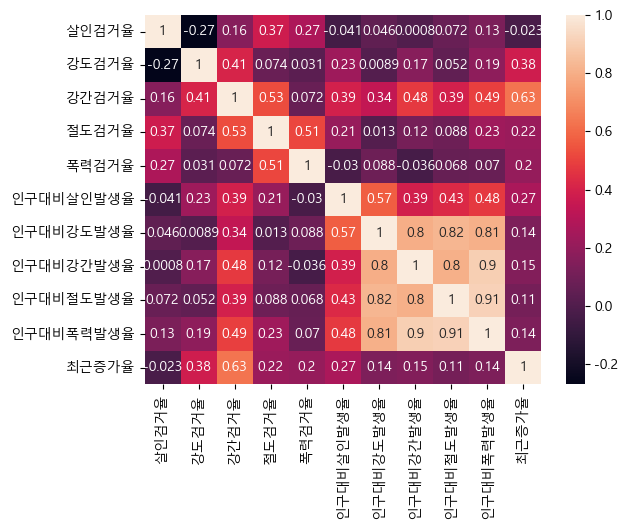

In [ ]:
import matplotlib.font_manager as fm
font_name =fm.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] =False

sns.heatmap(df_all[cols2].corr(), annot=True)
plt.show()

